In [95]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [96]:
df = pd.read_csv('train.csv')
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### We select only categoriczl variables from the dataframe and form a new dataframe

In [97]:
df_cat=df.select_dtypes(include=['object'])
df_cat.shape

(1460, 43)

### Finding the percentage of missing data in each categorical column

In [98]:
miss_catval_per = df_cat.isnull().sum()/df_cat.shape[0]*100
miss_catval_per

MSZoning          0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinType2      2.602740
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.068493
KitchenQual       0.000000
Functional        0.000000
FireplaceQu      47.260274
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageCond        5.547945
P

### For columns with % >20 we drop those categorical columns

In [99]:
drop_cols = [var for var in df_cat.columns if (df_cat[var].isnull().sum()/df_cat.shape[0])*100>20]
drop_cols

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [100]:
df_cat_2 = df_cat.drop(columns=drop_cols)
df_cat_2.shape

(1460, 38)

### Finding the categorical columns which have missing values

In [101]:
missing_cat_vars =[var for var in df_cat_2.columns if df_cat_2[var].isnull().sum()>0] 
missing_cat_vars

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

### Now we impute the missing values in the above columns with their respective modes 

In [102]:
df_cat_2['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [103]:
# mode is None
df_cat_2['MasVnrType'].fillna(df_cat_2['MasVnrType'].mode()[0],inplace=True)

In [104]:
df_cat_2['MasVnrType'].isnull().sum()

0

### Using a loop to do the same task for other categorical columns with missing values

In [105]:
for var in missing_cat_vars:
        print(df_cat_2[var].mode()[0])
        df_cat_2[var].fillna(df_cat_2[var].mode()[0],inplace=True)

None
TA
TA
No
Unf
Unf
SBrkr
Attchd
Unf
TA
TA


In [112]:
df_cat_2[missing_cat_vars].isnull().sum()

MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

### Visualizing the data diatribution before and after imputing using histogram

[]

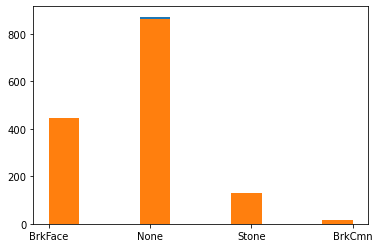

In [107]:
plt.hist(df_cat_2['MasVnrType'],label='After imputing')
plt.hist(df_cat['MasVnrType'].dropna(),label='Before imputing')
plt.plot()

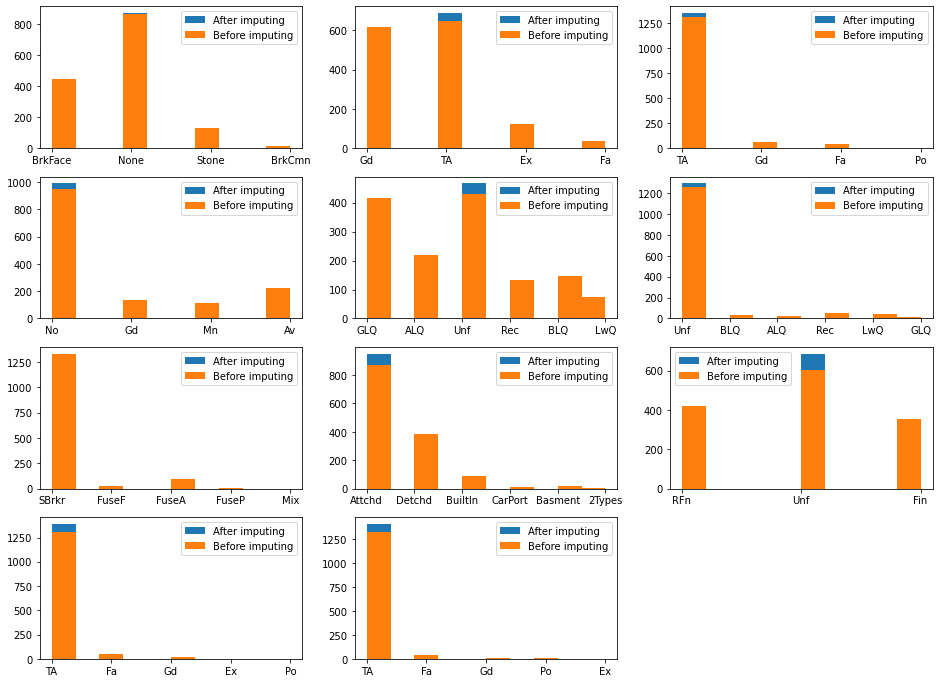

In [108]:
plt.figure(figsize=(16,12))
for i,var in enumerate(missing_cat_vars):
    plt.subplot(4,3,i+1)
    plt.hist(df_cat_2[var],label='After imputing')
    plt.hist(df_cat[var].dropna(),label='Before imputing')
    plt.legend()
    plt.plot()

### Updating our main dataset

In [109]:
df.update(df_cat_2)
df.drop(columns=drop_cols,inplace=True)

In [110]:
df.select_dtypes(include=['object']).isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64